In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
np.random.seed(123)
tf.random.set_seed(1234)

In [2]:
def gen_data():
    # Quadrado com canto superio esquerdo (-3,3) e inferior direito (3, -3)
    x_range = np.linspace(-3, 3, 30)
    #produto cartesiano
    xx, yy = np.meshgrid(x_range, x_range, indexing="ij")

    x = []
    y = []
    for i in range(len(xx)):
        for j in range(len(yy)):
            dist = np.power(xx[i,j], 2) + np.power(yy[i,j], 2)
            if dist <= 2:
                if dist <= 1.0:
                    y.append((0, 1))
                    x.append((xx[i, j], yy[i,j]))
            else:
                if np.random.uniform(0,1) >= 0.3: continue
                y.append((1,0))
                x.append((xx[i, j], yy[i,j]))

    return x, y

def exibe_dados(x, y):
    for i in range(len(x)):
        #print(x[i][0], x[i][1], np.argmax(y[i]))
        c = "b" if np.argmax(y[i]) == 0 else "r"
        plt.scatter(x[i][0], x[i][1], c=c)
    plt.show()

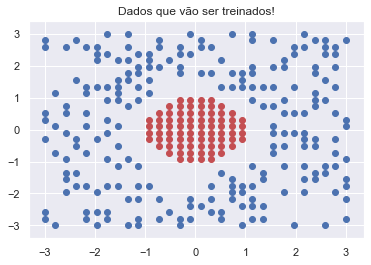

Iniciado treino..
Treinei modelo!


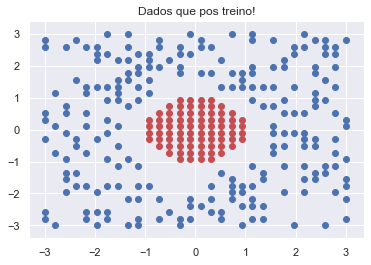

In [12]:
x, y = gen_data()

plt.title("Dados que vão ser treinados!")
exibe_dados(x, y)

#tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    #tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(2, activation="tanh")
])

#optim = tf.keras.optimizers.SGD(lr=0.471)
optim = tf.keras.optimizers.Adam(learning_rate=0.031)
model.compile(
    optimizer=optim,
    loss='mean_squared_error',
    metrics=["accuracy"]
)

# model.summary()
print("Iniciado treino..")
_ = model.fit(x, y, epochs=30, verbose=0)
print("Treinei modelo!")

y_pred = model.predict(x)
plt.title("Dados que pos treino!")
exibe_dados(x, y_pred)